# Petfinder Data: Machine Learning for Marketing Shelter Animals


### The goal of this poject was to determine how to better market shelter animals. We approached this by using datasets available on Kaggle that contained the information we were interested in: the descriptions used to advertise the pets and the adoption speed. 

In [21]:
#importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import json
import os

# Beginning E.D.A.

### We had to determine what the data looked like, and explore the best options for extracting the information we needed. 

In [22]:
breed_labels = pd.read_csv('csdata/breed_labels.csv')
breed_labels.head(10)

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita
5,6,1,Alaskan Malamute
6,7,1,American Bulldog
7,8,1,American Eskimo Dog
8,9,1,American Hairless Terrier
9,10,1,American Staffordshire Terrier


In [23]:
train = pd.read_csv('csdata/train.csv/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

#### It appears as though there are very few null values, and approximately 15000 usable pet adoptions in the training set psrovided to us.

Text(0, 0.5, '# of Photos')

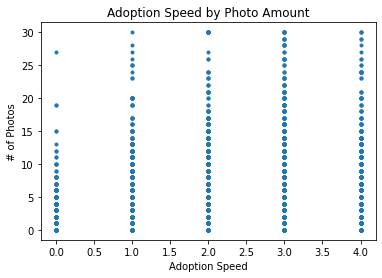

In [24]:
plt.plot(train['AdoptionSpeed'], train['PhotoAmt'], '.')
plt.title("Adoption Speed by Photo Amount")
plt.xlabel("Adoption Speed")
plt.ylabel("# of Photos")

### It appears as though the fastest adoptions did not have as many photos used to advertise them. This might be because there was not enough time for the shelter to take photos and upload them. 

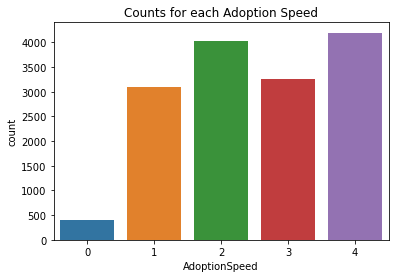

In [25]:
#creating a countplot for the amount of each pet in each adoption category
sns.countplot(x='AdoptionSpeed', data=train)
plt.title('Counts for each Adoption Speed')
plt.show()

### There are significantly fewer animals that were adopted in the same day, and it appears as though the most common adoption speeds are 4 (over four months) or 2 (adopted within a month). 

# Functions for working with JSON files

### The pre-performed sentiment analysis came in the form of hundreds of thousands of JSON files. When we attempted to read these in using the built-in read_json() function, there was no success. To work around this issue, we decided to write our own functions that would take the important portions of the sentiment anaylis JSON files and store them in an accessible way. In order to ensure that there was not a significant amount of files to download, we decided to include the final file (Sentiment_Scores.csv) rather than all of the files and run the code. The code that we used is commented out below so that there is documentation about how we went about this.

In [26]:
def get_sentences(dict):
    """Returns the sentences from the pet dict as one big paragraph"""
    para = ''
    for i in range(len(dict['sentences'])):
        para += dict['sentences'][i]['text']['content']
    return para

In [27]:
def get_sentiment_score(filename):
    """Returns a dataframe with the magnitude and sentiment score from given json file"""
    results_dict={}
    with open(filename) as file:
        try:
            jDict = json.load(file)
            results_dict['Description'] = get_sentences(jDict)
            results_dict['magnitude'] = jDict['documentSentiment']['magnitude']
            results_dict['score'] = jDict['documentSentiment']['score']
            return pd.DataFrame(results_dict,index=[0])
        except UnicodeDecodeError:
            return pd.DataFrame({'Description':'NaN', 'magnitude': 'NaN','score':'NaN'},index=[])

In [28]:
#this was for working with the json files, which we did not include because there were so many files
#import os
#collected = pd.DataFrame()
#dir = os.listdir('test_sentiment')
#for file in dir:
    #filename = 'test_sentiment/'+ file
    #collected = collected.append(get_sentiment_score(filename))

# Scores now in CSV file

In [29]:
#these are the scores associated with the json files
#collected = collected.reset_index(drop=True)

In [30]:
#this file is included, and resulted from the previous lines of code
collected = pd.read_csv('Sentiment Scores.csv')

# Making dataframe from given train and test csv files with matching descriptions from sentiment scores csv
## set 1

In [31]:
set1 = pd.read_csv('csdata/train.csv/train.csv')
set1.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

In [32]:
collected.head()

,Unnamed: 0,Description,magnitude,score
0,0,I found Mowgli four years ago when he was a pu...,1.7,0.0
1,1,Seidi was rescued at Glenmaria area.She is a v...,4.8,0.5
2,2,I have 5 cats and need to move to a smaller pl...,0.9,0.3
3,3,both female dogs r thrown away at d food court...,0.2,-0.2
4,4,I'm a young lady born January .I am really qui...,1.6,0.5


In [33]:
set1[set1['Description'].isin(collected['Description'])] #Use Boolean indexing to find matches

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
140,2,Manja,7,254,303,2,1,4,7,2,...,1,1,0,41326,f1ef4bef6ae16604d7a9025549d267e9,0,Cat for adoption,b36616178,7.0,2
368,1,Kangga,2,307,0,1,2,0,0,2,...,1,1,1,41336,4c0b696e99000daa96cd0c8d3df30dc4,0,Puppy for adoption,4060caeb1,3.0,1
394,1,Male Schnauzer For Adoption PJ,25,195,0,1,6,7,0,2,...,1,1,100,41326,55f8bf7b06f67e5917f086225aad3e2a,0,Dog for adoption,e2f1f5377,2.0,1
625,2,Champange,4,243,266,2,5,7,0,1,...,1,1,80,41326,fb711bcd4f1b0bc5898eb8ca3ed7f366,0,Cat for adoption,c0fe34d97,13.0,3
630,2,DD,5,266,0,2,5,0,0,3,...,1,1,0,41326,c7031d72946eb669eb88d18aeb4297fa,0,Cat for adoption,406a1e534,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14066,2,NaN,3,285,0,2,1,6,0,1,...,1,1,0,41326,56eba43432b2063afa70e4ec7df5bfce,0,Cat for adoption,d4ae1eedd,1.0,1
14123,1,Blackkie,12,307,0,1,1,0,0,2,...,1,2,0,41401,c21964293515648bb8377032ad232f91,0,Dog for adoption,03f130f5f,3.0,2
14149,2,Cini,2,265,0,1,1,7,0,1,...,1,1,0,41326,28765cc4c3eadeb8a1f2ae0d7cb235e8,0,Kitten for adoption,8240f1522,3.0,3
14825,2,Hiro Jr,6,265,0,1,5,0,0,2,...,1,1,0,41326,6ee0d70f9a3d397d008448d7cbb56f5d,0,Cat for adoption,546aef659,1.0,3


In [34]:
set1.iloc[140]['Description']

'Cat for adoption'

## Set 2

In [35]:
set2=pd.read_csv('csdata/test.csv/test.csv')


In [36]:
set2[set2['Description'].isin(collected['Description'])] #Repeat the process

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt
35,1,D192 (020413),24,307,0,2,2,0,0,2,...,1,1,1,50,41326,62a25cadb85658be5275bd54a3b8c76d,0,"Please contact us to adopt this pet, or visit ...",dd5dc51dc,4.0
36,1,D93(110414),49,78,0,2,1,2,0,3,...,1,1,1,500,41326,62a25cadb85658be5275bd54a3b8c76d,0,"Please contact us to adopt this pet, or visit ...",5890ff277,1.0
37,2,C4 Anusha,10,266,0,2,1,0,0,1,...,1,1,1,50,41326,62a25cadb85658be5275bd54a3b8c76d,0,Anusha is a very friendly and loving little gi...,2191e428d,3.0
38,2,64752 (C4),7,266,0,2,1,4,7,1,...,1,1,1,80,41326,62a25cadb85658be5275bd54a3b8c76d,0,"Please contact us to adopt this pet, or visit ...",0ecec0922,1.0
40,1,D79(271213),27,307,0,2,2,0,0,1,...,1,1,1,50,41326,62a25cadb85658be5275bd54a3b8c76d,0,"Please contact us to adopt this pet, or visit ...",971c5506a,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,1,Havent Get Name,1,307,307,2,1,2,0,1,...,1,1,5,0,41326,8ba838281cce5f55bc3200efc0e218f2,0,really like the pet ppl and love pet ppl..,ea6d84c73,1.0
3959,2,Lucky,1,266,0,2,1,7,0,1,...,2,1,1,0,41401,ecb150155e786ef6367fa857c6c8aabd,0,It was found,eea8e2b57,3.0
3961,1,Don Don,12,109,0,1,3,0,0,3,...,1,1,1,300,41401,3d06dc9a6a11aedbd18cda42ff6ebdd1,0,Dog for adoption,34a2402b3,5.0
3969,2,NaN,5,300,0,3,1,2,4,2,...,2,1,6,0,41401,30aa45fdbe45e39d5614ef583b569073,0,these cat's mother was killed when they was ne...,399013029,1.0


In [37]:
# here we have combined both the train and test sets into a larger dataframe
full_set = set1.append(set2)

In [38]:
sent_analyzed = full_set[full_set['Description'].isin(collected['Description'])].merge(collected,
                                                                                       on='Description',how='outer')

# Finally, Drop NAs and the dataframe is usable

In [39]:
sent_dropped = sent_analyzed.dropna()

In [40]:
sent_dropped['AdoptionSpeed'].value_counts() #Much smaller dataset

1.0    140
2.0    117
3.0     80
4.0      6
Name: AdoptionSpeed, dtype: int64

### We see here the difference in mean sentiment score per adoption speed and how it is much larger at category 4
Also we see the which features correlate with adoption speed

In [41]:
sent_dropped.pivot_table('score',columns=['AdoptionSpeed'],aggfunc='mean')

AdoptionSpeed,1.0,2.0,3.0,4.0
score,0.122143,0.117094,0.10875,0.516667


In [42]:
sent_dropped.corr

<bound method DataFrame.corr of      Type      Name   Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2.0     Manja   7.0   254.0   303.0     2.0     1.0     4.0     7.0   
1     2.0     Manja   7.0   254.0   303.0     2.0     1.0     4.0     7.0   
2     2.0     Manja   7.0   254.0   303.0     2.0     1.0     4.0     7.0   
3     2.0     Manja   7.0   254.0   303.0     2.0     1.0     4.0     7.0   
4     2.0     Manja   7.0   254.0   303.0     2.0     1.0     4.0     7.0   
..    ...       ...   ...     ...     ...     ...     ...     ...     ...   
572   2.0      Coco  12.0   299.0     0.0     1.0     1.0     6.0     0.0   
573   2.0    Ginger   7.0   266.0     0.0     1.0     4.0     7.0     0.0   
575   1.0  Closed -   4.0   307.0     0.0     1.0     2.0     0.0     0.0   
576   1.0  Closed -   4.0   307.0     0.0     1.0     2.0     0.0     0.0   
577   1.0  Closed -   4.0   307.0     0.0     1.0     2.0     0.0     0.0   

     MaturitySize  ...    State            

### Dropping the NAs resulted in a significantly smaller dataset. We could have solved this by using feature selection and only keeping the features that had the highest correlation with adoption speed, but we knew that there were so many variables that went into deciding whether or not to adopt an animal, so we kept all of the features. Future implementation could look into using feature selection to keep a larger dataframe.

### Decision tree with sentiment analysis


### We decided to use decision trees because that more closely modeled how a person would decide on a pet. We also have the most exposure to this algorithm in class, so are more aware of its possible drawbacks and benefits.

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(max_depth=4,min_samples_leaf=0.15)
X_train,X_test,y_train,y_test = train_test_split(sent_dropped[['score','magnitude']],sent_dropped['AdoptionSpeed'])
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
acc_score

0.4418604651162791

### We noticed that this decision tree, created without using the score or magnitude of the sentiment, performed extremly poorly on the test data.

### TF-IDF and Gaussian NB without sentiment

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
chumpFrame = sent_dropped
tf_idf = TfidfVectorizer()
transformed_words = tf_idf.fit_transform(chumpFrame.Description)
nb = GaussianNB()
y=chumpFrame['AdoptionSpeed']
X_train,X_test,y_train,y_test = train_test_split(transformed_words.toarray(),y,stratify=y)
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
display(accuracy_score(y_test,y_pred))
dt.fit(X_train,y_train)
y_preds_dt = dt.predict(X_test)
accuracy_score(y_test,y_preds_dt)

0.313953488372093

0.4069767441860465

### Once again, this data set without sentiment analysis performed extremely poorly on the data. We decided to move on to including the sentiment analysis so that we could demonstrate its effectiveness.

### Random forest with Cross validation on sentiment analysis

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
rf = RandomForestClassifier(n_estimators=20,max_depth=5,min_samples_leaf=0.1)
X_train,X_test,y_train,y_test = train_test_split(sent_dropped[['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State',
       'VideoAmt', 'PhotoAmt','score','magnitude']],sent_dropped['AdoptionSpeed'])
cv_results = cross_validate(rf,X_train,y_train,n_jobs=10)

cv_results

{'fit_time': array([0.03200841, 0.0250051 , 0.02300453, 0.02600598, 0.02200556]),
 'score_time': array([0.00299978, 0.00400019, 0.0030005 , 0.0030005 , 0.00200105]),
 'test_score': array([0.51923077, 0.51923077, 0.43137255, 0.47058824, 0.54901961])}

### This model performed better on the new data, but still had a low enough score that we were not satisfied.

In [46]:
test_frame = full_set.dropna()
test_frame['AdoptionSpeed'].shape

(13724,)

### Random forest (with CV) without sentiment analysis

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
rf = RandomForestClassifier(n_estimators=20,max_depth=5,min_samples_leaf=0.1)
X_train,X_test,y_train,y_test = train_test_split(test_frame[['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State',
       'VideoAmt', 'PhotoAmt']],test_frame['AdoptionSpeed'])
cv_results = cross_validate(rf,X_train,y_train,n_jobs=10)

cv_results

{'fit_time': array([0.06352115, 0.06551981, 0.06151915, 0.06251931, 0.06051993]),
 'score_time': array([0.0059998 , 0.00600195, 0.00500154, 0.00600195, 0.00500035]),
 'test_score': array([0.34579893, 0.35648373, 0.35405537, 0.35617104, 0.35034014])}

# Code used in slideshow

### This uses the sentiment analysis and TF-IDF together in a random forest with a Grid Search cross validation. We repeated the test with even more parameters than shown here.


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(n_estimators=20)

params = {'max_depth':[4,5,6,7],
         'min_samples_leaf' : [0.03,0.05,0.07,0.09]}

griddy = GridSearchCV(estimator=rf,param_grid=params,cv=3)

column_t = ColumnTransformer([('tfidf1',tf_idf,'Description')],remainder='passthrough')

pipeline = Pipeline([('tfidf',column_t), ('classify',griddy)])

column_list = ['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State',
       'VideoAmt', 'PhotoAmt','score','magnitude','Description']

X_train,X_test,y_train,y_test = train_test_split(sent_dropped[column_list],sent_dropped['AdoptionSpeed'],stratify=y) #stratify y?

pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tfidf1', TfidfVectorizer(),
                                                  'Description')])),
                ('classify',
                 GridSearchCV(cv=3,
                              estimator=RandomForestClassifier(n_estimators=20),
                              param_grid={'max_depth': [4, 5, 6, 7],
                                          'min_samples_leaf': [0.03, 0.05, 0.07,
                                                               0.09]}))])

In [49]:
y_predpipe = pipeline.predict(X_test)
accuracy_score(y_test,y_predpipe)

0.8255813953488372

In [50]:
display(griddy.best_params_)
griddy.best_score_

{'max_depth': 7, 'min_samples_leaf': 0.03}

0.7160966712266301

#### This is a significantly higher score! However, this score can still be improved.

In [51]:
{'max_depth': 4, 'min_samples_leaf': 0.09}
{'max_depth': 6, 'min_samples_leaf': 0.05}

{'max_depth': 6, 'min_samples_leaf': 0.05}

## Pipeline without sentiment analysis
### This uses no sentiment analysis but more data. It gets a lower score!

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(n_estimators=20)
params = {'max_depth':[4,5,6,7],
         'min_samples_leaf' : [0.03,0.05,0.07,0.09]}
griddy = GridSearchCV(estimator=rf,param_grid=params,cv=3)
column_t = ColumnTransformer([('tfidf1',tf_idf,'Description')],remainder='passthrough')
pipeline = Pipeline([('tfidf',column_t), ('classify',griddy)])
X_train,X_test,y_train,y_test = train_test_split(test_frame[['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State',
       'VideoAmt', 'PhotoAmt','Description']],test_frame['AdoptionSpeed'])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tfidf1', TfidfVectorizer(),
                                                  'Description')])),
                ('classify',
                 GridSearchCV(cv=3,
                              estimator=RandomForestClassifier(n_estimators=20),
                              param_grid={'max_depth': [4, 5, 6, 7],
                                          'min_samples_leaf': [0.03, 0.05, 0.07,
                                                               0.09]}))])

In [53]:
display(griddy.best_params_)
griddy.best_score_

{'max_depth': 7, 'min_samples_leaf': 0.03}

0.3239094530263286

### Still a low score. This demonstrates that sentiment analysis is very important for determining how quickly a pet will be adopted.

# Now that we have the ML alogrithms working we moved onto creating descriptions with the sentiment analysis

In [54]:
#importing the necessary packages
import collections
import csv

In [55]:
#reading in the sentiment_scores file and dropping unnecessary columns
df= pd.read_csv('Sentiment_Scores.csv')
df.drop("Unnamed: 0", axis= 1, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'Sentiment_Scores.csv'

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df[["Description"]].head()

In [ ]:
#imports the CountVectorizer and creates an instance of the class
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2,2))
print(vectorizer)

In [ ]:
#fits the vectorizer to the data without the Description feature to get the scores for the word sets

X = vectorizer.fit_transform(sent_dropped["Description"])
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
df_bow_sklearn.value_counts()

In [ ]:
df_bow_sklearn.sum()

In [ ]:
#drops the na from the set containing only the training and testing data
FullSetdrop=full_set.dropna()

In [ ]:
#fits the vectorizer to the descriptions in FullSetdrop with the fastest adoption speed
y = vectorizer.fit_transform(FullSetdrop[FullSetdrop["AdoptionSpeed"]==0.0]["Description"])
df_bow_sklearns = pd.DataFrame(y.toarray(),columns=vectorizer.get_feature_names())
df_bow_sklearns.sum()

### We noticed that some of this data was not in English. If we were to be using this data for something other than generating pet descriptions we would either need to translate this data or remove the non-English data for the sentiment analysis and thus the machine learning models to function properly. Becaue we are just using this data to generate pet descriptions, the non-English descriptions are not a problem. 

### Using an out of program WordCloud, we divded the data into each category of adoption speed to see what words were most frequent

In [ ]:
ForZeros=df_bow_sklearns.sum().sort_values().tail(50)

In [ ]:
ForOnes=df_bow_sklearns.sum().sort_values().tail(50)

In [ ]:
ForFours=df_bow_sklearns.sum().sort_values().tail(50)

In [ ]:
print(ForFours)

### If we were to create different types of pet description, where the user could select from a list of words that were proven to be the most effective, we could use these bigrams to create that list of words. However, because our descriptions are more generic than that, we did not have a need to implement this.

### Finally, we wrote a function to generate sentiment-neutral descriptons based on another data set

In [ ]:
newData = pd.read_csv('NEW_data/NEW data.csv')

In [ ]:
def gen_new_description(newData):
    for i in range(len(newData)):
        pet=newData['Animal Type'].iloc[i].lower()
        age=newData['Age upon Intake'].iloc[i].lower()
        breed=newData['Breed'].iloc[i].lower()
        sex=newData['Sex upon Intake'].iloc[i].lower()
        foundhow=newData['Intake Type'].iloc[i].lower()
        
        description=f'This {pet} is a {age} old, {sex}, {breed}. This {pet} was brought in as a {foundhow}.'
        print(description)
        
gen_new_description(newData)

### This demonstrates the ability to create pet descriptions that are effective and make sense.

## Conclusions

### We found that the best pet descriptions were the ones with the most analytical approach. Pet descriptions that were more personable, or had a higher sentiment analysis, were adopted much slower than their more analytical counterparts. Some considerations are the fact that other parts of a pet's identity have a large impact on their adoption speed as well. Things like breed, age, and health all have a correlation to the speed of adoption, meaning that it is impossible for a pet description to ensure that a pet is adopted quickly. Additionally, some of the data in this dataset are not in English. Non-English languages might have different trends in adoption descriptions because of how the language operates and how the culture surrounding the language might affect pet adoptions. 